# 1. Classification

In [1]:
# Import modules
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Load dataset
digits = datasets.load_digits()
# Create data and label arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

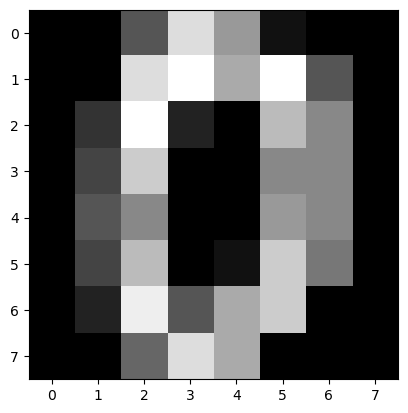

In [3]:
plt.imshow(X[0].reshape((8, 8)), cmap='gray')

# KNN

0.9909533750869868
0.9888888888888889


Text(50.722222222222214, 0.5, 'True label')

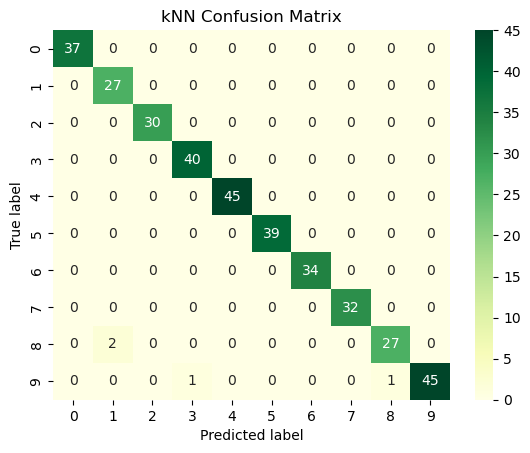

In [4]:
k=2 # check this number
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(X_train, y_train)
print(kNN.score(X_train, y_train))
print(kNN.score(X_test, y_test))
kNN_accuracy = kNN.score(X_test, y_test)

kNN_pred = kNN.predict(X_test)

conf_matrix = confusion_matrix(y_test, kNN_pred)
ax = sns.heatmap(conf_matrix, annot=True, cmap="YlGn")
plt.title("kNN Confusion Matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

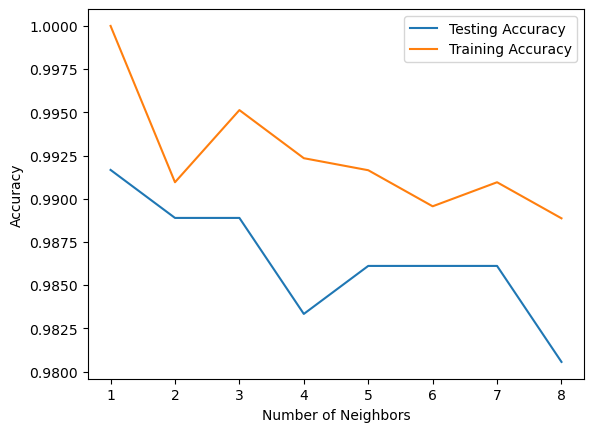

In [5]:
#kNN Classifier
number_neighbors = []
testing_scores = []
training_scores = []


# For loop to get up to 8 neighbours :
for i in range(1,9): # or something like that
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(X_train,y_train) # CHECK WHAT THIS SHOULD BEEE
    number_neighbors.append(i)
    training_scores.append(kNN.score(X_train,y_train))
    testing_scores.append(kNN.score(X_test, y_test))

    
# something wrong here, graphs a bit cooked
plt.plot(number_neighbors, testing_scores, label="Testing Accuracy")
plt.plot(number_neighbors, training_scores, label="Training Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()

In this case, K = 2 looks best

1.0 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.90      1.00      0.95        27
           2       1.00      0.97      0.98        30
           3       0.95      1.00      0.98        40
           4       1.00      0.98      0.99        45
           5       1.00      1.00      1.00        39
           6       1.00      1.00      1.00        34
           7       1.00      0.97      0.98        32
           8       0.96      0.93      0.95        29
           9       0.96      0.94      0.95        47

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



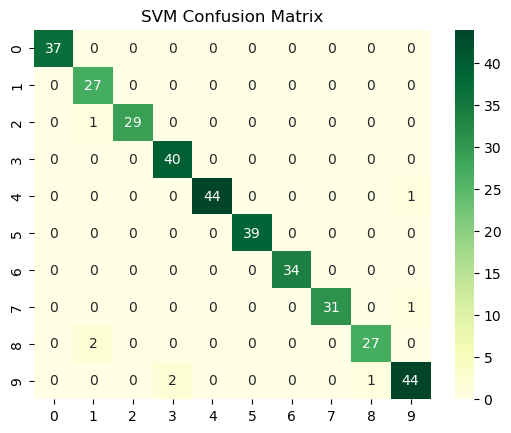

In [6]:
# SVM has worse accuracy than kNN , should see this once its done !!

svm = SVC(kernel ='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(svm.score(X_train, y_train), svm.score(X_test, y_test)) 
svm_pred = svm.predict(X_test) # prediction vectors

sum(kNN_pred != svm_pred)
sum(kNN_pred != y_test)
sum(svm_pred != y_test)

print(classification_report(y_test, svm_pred)) # classification report

conf_matrix = confusion_matrix(y_test, svm_pred)
ax = sns.heatmap(conf_matrix, annot=True, cmap="YlGn")
plt.title("SVM Confusion Matrix")
svm_accuracy = svm.score(X_test, y_test)


# Kernels

In [7]:
# SVM/SVC Classifier
kernels = ['linear', 'poly', 'rbf', 'sigmoid'] # different mathematical functions to model relationships
# polynomial should have better accuracy i think than the others from what he said in the lab


svm_accuracies = []
data_labels = []
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(kernel)
    print(classification_report(y_test, y_pred))
    print(svm.score(X_train, y_train),svm.score(X_test, y_test))
    svm_accuracies.append(round(svm.score(X_test, y_test), 2)) 
    data_labels.append(kernel)


svm_accuracies = np.array(svm_accuracies) 
label_array = np.arange(0, len(data_labels))
"""
plt.bar(label_array, svm_accuracies, align='center')
plt.xticks(label_array, data_labels)
plt.title("Accuracy Comparison")
"""

linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.90      1.00      0.95        27
           2       1.00      0.97      0.98        30
           3       0.95      1.00      0.98        40
           4       1.00      0.98      0.99        45
           5       1.00      1.00      1.00        39
           6       1.00      1.00      1.00        34
           7       1.00      0.97      0.98        32
           8       0.96      0.93      0.95        29
           9       0.96      0.94      0.95        47

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

1.0 0.9777777777777777
poly
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.96      1.00      0.98        27
           2       1.00      1.00      1.00

'\nplt.bar(label_array, svm_accuracies, align=\'center\')\nplt.xticks(label_array, data_labels)\nplt.title("Accuracy Comparison")\n'

The linear and poly kernals look the best

// actually the rbf looks the best ??

# Naive Bayes

Text(50.722222222222214, 0.5, 'True label')

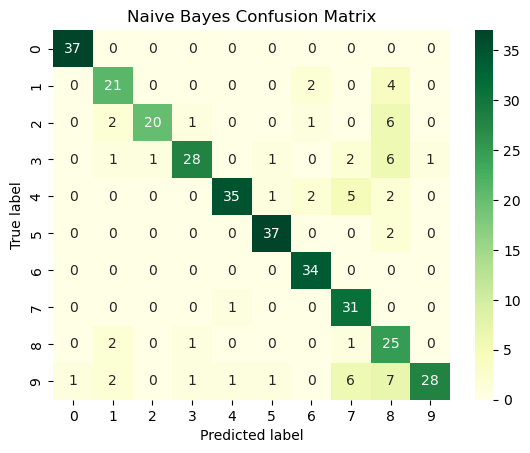

In [8]:
# Naive Bayes
# not usually used in real world cuz accuracy is not that good, and computing the probabilities takes a lot of processing power or something.
# uses estimations which aren't normally correct.
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
bayes_accuracy = bayes.score(X_test, y_test)

conf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_matrix, annot=True,cmap="YlGn")
plt.title("Naive Bayes Confusion Matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

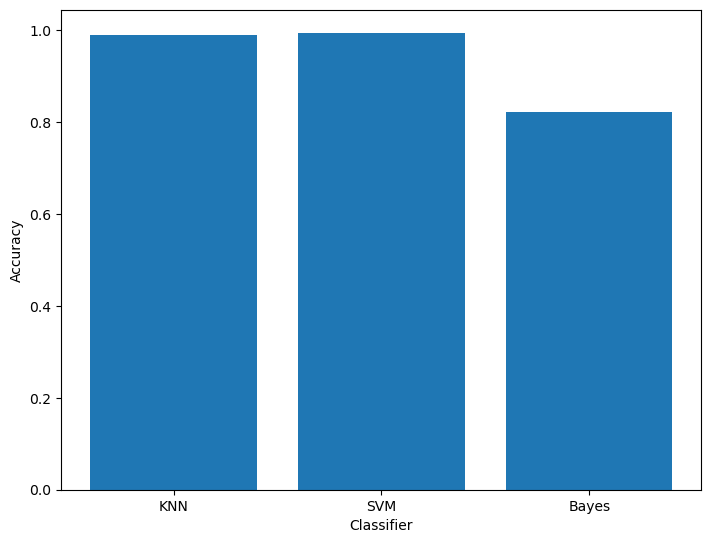

In [9]:
# Compare the accuracy of different classifiers in the same plot.
scores = []
labels = ["KNN", "SVM", "Bayes"]
classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    SVC(kernel="poly"),
    GaussianNB()
]

# for each classifier in the list of above classifier
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    scores.append(classifier.score(X_test, y_test))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,scores)
ax.set_xlabel("Classifier")
ax.set_ylabel("Accuracy")
plt.show()

# 2. Regression

In [10]:
# Load gapminder
df = pd.read_csv("gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


C:\Users\Madi\AppData\Local\Temp\ipykernel_19592\1910732695.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="RdYlGn")


<Axes: >

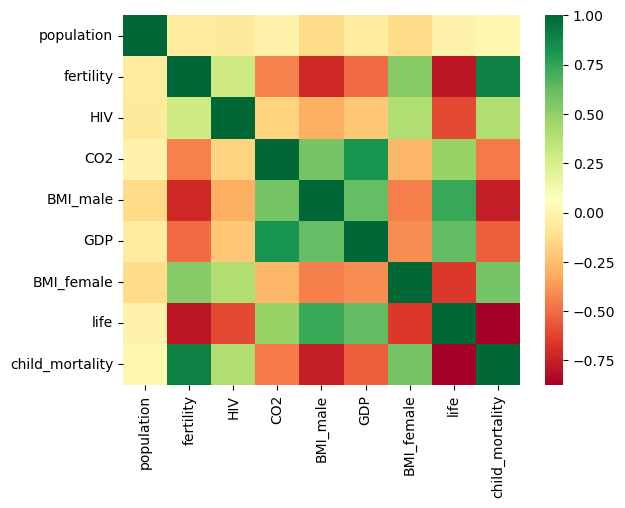

In [11]:
# Heatmap
sns.heatmap(df.corr(), cmap="RdYlGn")

0.6192442167740035


Text(0, 0.5, 'Life Expectency')

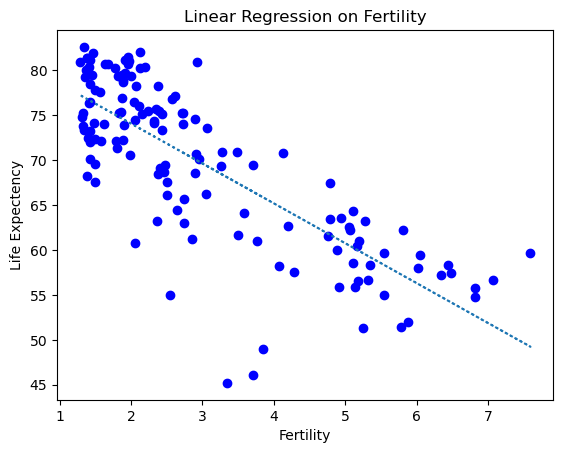

In [12]:
# Linear Regression
x = df["fertility"].to_numpy() # this is to fix the multidimensional indexing issue from [:, None]
y = df["life"]

# for a classification, you need to have a learning algortihm to fit the data.
# for regression problem, you can use the squared error 
# (is this mean squared error? idk.) just check this before commiting it to the brain..

regression = LinearRegression()
regression.fit(x[:, None], y)
print(regression.score(x[:, None], y))

fig, ax = plt.plot(x,y, 'bo', x, regression.predict(x[:, None]), ':')
plt.title("Linear Regression on Fertility")
plt.xlabel("Fertility")
plt.ylabel("Life Expectency")

In [13]:
# Linear regression on all
X = df[["fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]]
y = df["life"]

regression_all = LinearRegression()
regression_all.fit(X,y)
print(regression_all.score(X, y))

0.8974995317332959


In [14]:
# Cross validation score
print(cross_val_score(regression, x[:, None], y, cv=5))
print(cross_val_score(regression_all, X, y, cv=5))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
[0.81621881 0.8322471  0.90868335 0.81325568 0.94404223]


# Logistic Regression

In [15]:
# Load creditcard
df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


492 frauds,  284315 nonfrauds.


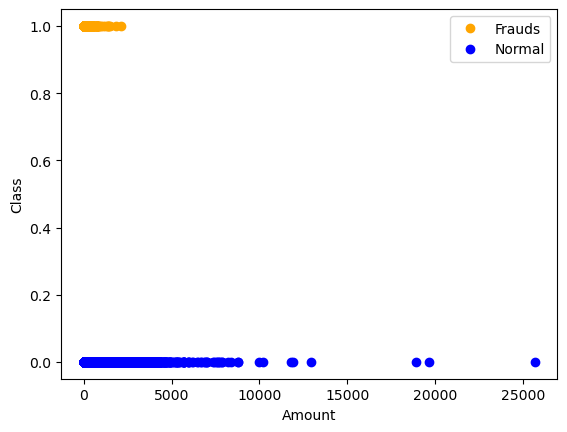

In [16]:
# Class and amount comparison
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(frauds), "frauds, ", len(non_frauds), "nonfrauds.")

plt.plot(frauds.Amount, frauds.Class, 'o', color="orange", label="Frauds")
plt.plot(non_frauds.Amount, non_frauds.Class, 'bo', label="Normal")
plt.xlabel("Amount")
plt.ylabel("Class")
plt.legend()

# conclusion: fraud transactions occur at low amounts

All the fraud cases occur at low amounts

## use LR to predict the fraud transactions then plot the confusion matrix of the model

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(50.722222222222214, 0.5, 'True label')

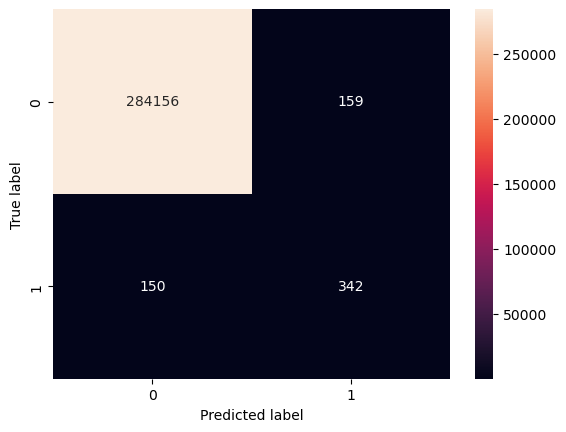

In [18]:
# Logistic Regression
X = df.drop("Class", axis=1)
y = df.Class

log_regression = LogisticRegression()
log_regression.fit(X, y)
y_pred = log_regression.predict(X)
conf_matrix = confusion_matrix(y, y_pred)

ax = sns.heatmap(conf_matrix, annot=True, fmt='g')
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")